In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import cv2
import pandas as pd
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
def load_data(folder, label, img_size=(64, 64)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, img_size)
            images.append(img)
            labels.append(label)
    return images, labels

Notebook provided in kaggle

In [3]:
base_path = '../input/american-sign-language-09az/American/'
classes = os.listdir(base_path)
filepaths = []
labels = []
for d in classes:
    flist = os.listdir(base_path + d)
    for f in flist:
        fpath = os.path.join(base_path + d + '/' + f)
        filepaths.append(fpath)
        labels.append(d)
print ('filepaths: ', len(filepaths), '   labels: ', len(labels))

filepaths:  142261    labels:  142261


In [4]:
Fseries=pd.Series(filepaths, name='file_paths')
Lseries=pd.Series(labels, name='labels')
df=pd.concat([Fseries,Lseries], axis=1)
df=pd.DataFrame(np.array(df).reshape(142261,2), columns = ['file_paths', 'labels'])
print(df['labels'].value_counts())


labels
o    7294
i    6807
l    6494
j    6124
d    6070
b    6070
f    6070
h    6070
c    6070
a    6070
g    6070
k    5488
n    3968
v    3926
q    3590
r    3538
u    3244
t    3076
e    3070
5    3070
8    3070
4    3070
7    3070
9    3070
0    3070
6    3070
m    2924
p    2566
y    2454
s    2374
x    2330
z    2218
w    2086
2    1570
1    1570
3    1570
Name: count, dtype: int64


balancing dataset

In [5]:
file_count = 1570
samples = []
for category in df['labels'].unique():    
    category_slice = df.query("labels == @category")    
    samples.append(category_slice.sample(file_count, replace=False,random_state=1))
df = pd.concat(samples, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)
print (df['labels'].value_counts())
print (len(df))

labels
2    1570
v    1570
p    1570
q    1570
7    1570
5    1570
n    1570
1    1570
t    1570
4    1570
x    1570
8    1570
m    1570
j    1570
9    1570
0    1570
y    1570
z    1570
l    1570
c    1570
3    1570
k    1570
w    1570
i    1570
r    1570
o    1570
a    1570
d    1570
g    1570
b    1570
e    1570
u    1570
h    1570
s    1570
f    1570
6    1570
Name: count, dtype: int64
56520


printing dataset images

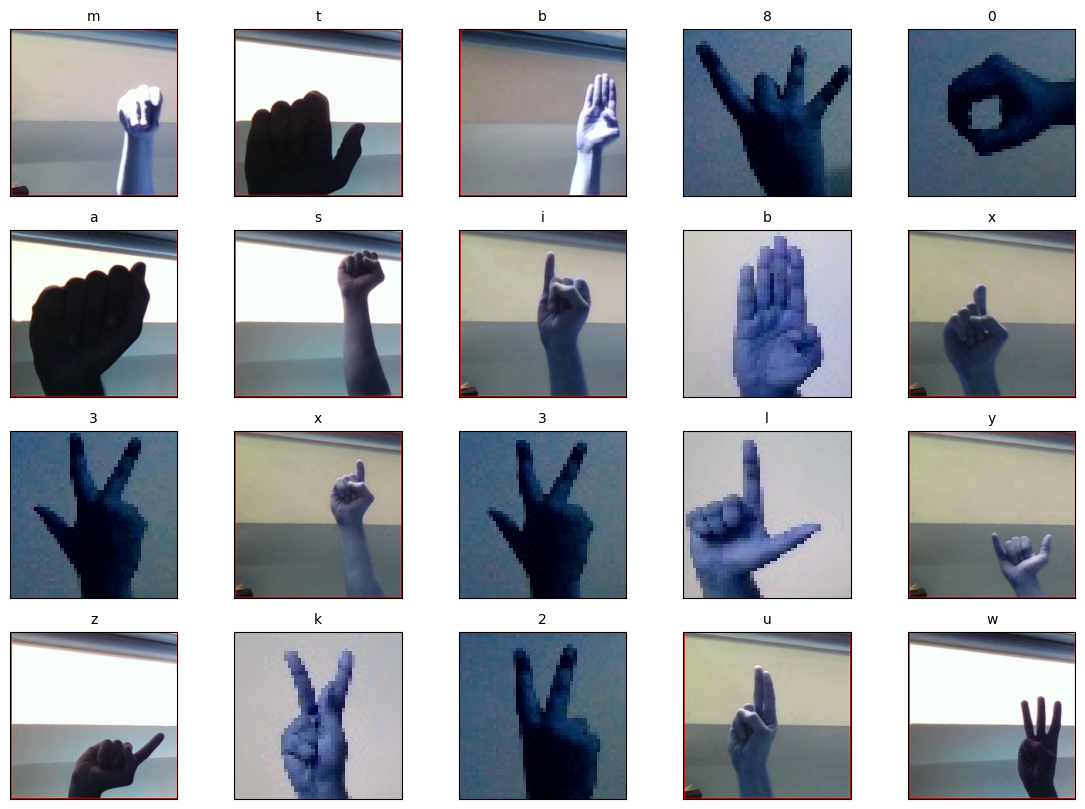

In [6]:
plt.figure(figsize=(14,10))
for i in range(20):
    random = np.random.randint(1,len(df))
    plt.subplot(4,5,i+1)
    plt.imshow(cv2.imread(df.loc[random,"file_paths"]))
    plt.title(df.loc[random, "labels"], size = 10, color = "black") 
    plt.xticks([])
    plt.yticks([])
    
plt.show()

All Combined

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd


# Base path and class listing
base_path = '../input/american-sign-language-09az/American/'
classes = os.listdir(base_path)
filepaths = []
labels = []
for d in classes:
    flist = os.listdir(os.path.join(base_path, d))
    for f in flist:
        fpath = os.path.join(base_path, d, f)
        filepaths.append(fpath)
        labels.append(d)

print('Filepaths: ', len(filepaths), '   Labels: ', len(labels))

# Create a DataFrame for balancing the dataset
df = pd.DataFrame({'file_paths': filepaths, 'labels': labels})
file_count = 500  

samples = []
for category in df['labels'].unique():
    category_slice = df.query("labels == @category")
    samples.append(category_slice.sample(file_count, replace=False, random_state=1))

balanced_df = pd.concat(samples, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)
print(balanced_df['labels'].value_counts())
print(len(balanced_df))

filepaths = balanced_df['file_paths'].tolist()
labels = balanced_df['labels'].tolist()
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
filepaths_train, filepaths_test, labels_train, labels_test = train_test_split(filepaths, encoded_labels, test_size=0.2, random_state=42)

def extract_hog_features(filepaths, img_size=(64, 64)):
    features = []
    for filepath in filepaths:
        img = cv2.imread(filepath)
        if img is not None:
            img = cv2.resize(img, img_size)
            gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            feature = hog(gray_image, pixels_per_cell=(8, 8), cells_per_block=(2, 2))
            features.append(feature)
    return np.array(features)


Filepaths:  142261    Labels:  142261
labels
7    500
m    500
a    500
p    500
g    500
w    500
y    500
2    500
8    500
6    500
q    500
3    500
t    500
f    500
d    500
9    500
x    500
h    500
l    500
u    500
v    500
i    500
1    500
c    500
b    500
j    500
5    500
4    500
0    500
e    500
r    500
s    500
z    500
n    500
o    500
k    500
Name: count, dtype: int64
18000


In [11]:
from sklearn.neighbors import KNeighborsClassifier
# Extract HOG features for Random Forest
X_train_rf = extract_hog_features(filepaths_train)
X_test_rf = extract_hog_features(filepaths_test)

# Build and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, labels_train)

# Predict and evaluate with Random Forest
y_pred_rf = rf_model.predict(X_test_rf)
accuracy_rf = accuracy_score(labels_test, y_pred_rf)
print(f'Random Forest Test accuracy: {accuracy_rf:.4f}')

# Extract HOG features for SVM
X_train_svm = X_train_rf  # Using the same features for SVM
X_test_svm = X_test_rf

# Build and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_svm, labels_train)

# Predict and evaluate with SVM
y_pred_svm = svm_model.predict(X_test_svm)
accuracy_svm = accuracy_score(labels_test, y_pred_svm)
print(f'SVM Test accuracy: {accuracy_svm:.4f}')


# Extract HOG features for training and testing data
X_train_knn = X_train_rf
X_test_knn = X_test_rf

# Build KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit model using the entire training dataset
knn_model.fit(X_train_knn, labels_train)

# Evaluate model
y_pred_knn = knn_model.predict(X_test_knn)
accuracy_knn = accuracy_score(labels_test, y_pred_knn)
print(f'Test accuracy: {accuracy_knn:.4f}')

Random Forest Test accuracy: 0.9783
SVM Test accuracy: 0.9831
Test accuracy: 0.9597


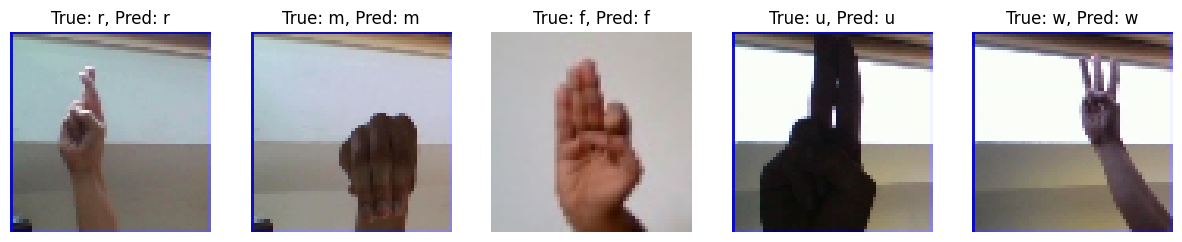

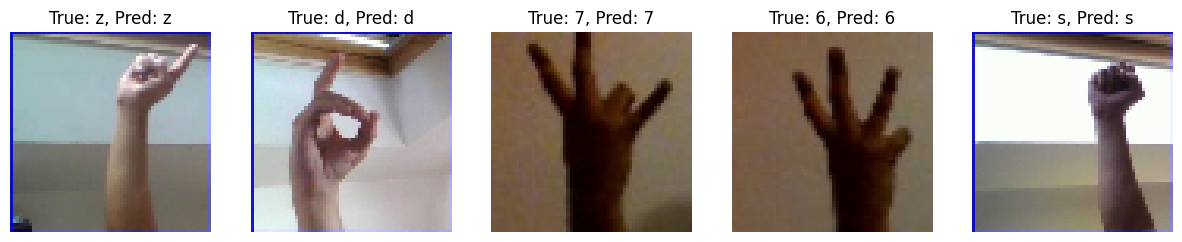

In [12]:
def display_predictions(model, filepaths, features, labels, label_encoder, num_samples=5, img_size=(64, 64)):
    random_indices = random.sample(range(len(filepaths)), num_samples)
    plt.figure(figsize=(15, 4))
    for i, idx in enumerate(random_indices):
        img = cv2.imread(filepaths[idx])
        if img is not None:
            img = cv2.resize(img, img_size)
            pred = model.predict([features[idx]])[0]
            pred_label = label_encoder.inverse_transform([pred])[0]

            plt.subplot(1, num_samples, i + 1)
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title(f"True: {label_encoder.inverse_transform([labels[idx]])[0]}, Pred: {pred_label}")
            plt.axis('off')
    plt.show()

# Display predictions for Random Forest
display_predictions(rf_model, filepaths_test, X_test_rf, labels_test, label_encoder, num_samples=5)

# Display predictions for SVM
display_predictions(svm_model, filepaths_test, X_test_svm, labels_test, label_encoder, num_samples=5)
